installing necessary packages

In [1]:
!pip install langchain langchain_openai langchain_experimental --user

  Using cached langchain_experimental-0.0.55-py3-none-any.whl.metadata (2.1 kB)


ERROR: Could not find a version that satisfies the requirement dotenv--user (from versions: none)
ERROR: No matching distribution found for dotenv--user


In [2]:
#Loading OpenAI API key
from dotenv import load_dotenv
load_dotenv()

True

## Data - Register of licensed sponsors by the UK Government 
https://www.gov.uk/government/publications/register-of-licensed-sponsors-workers

Exploring the data the traditional way

In [3]:
import pandas as pd
import pprint

In [4]:
df = pd.read_csv('2024-03-20_-_Worker_and_Temporary_Worker.csv')

In [5]:
df.head()

,Organisation Name,Town/City,County,Type & Rating,Route
0,McMullan Shellfish,Ballymena,Co Antrim,Worker (A rating),Skilled Worker
1,RSS EXPRESS LTD T/A Ledbury Fuel Service Sta...,Ledbury,NaN,Worker (A rating),Skilled Worker
2,(IECC Care) Independent Excel Care Consortium ...,Colchester,NaN,Worker (A rating),Skilled Worker
3,*ABOUTCARE HASTINGS LTD,East Sussex,NaN,Worker (A rating),Skilled Worker
4,???£ ESS LTD,Manchester,NaN,Worker (A rating),Skilled Worker


In [6]:
#Find types of routes
df.Route.unique()

array(['Skilled Worker', 'Creative Worker',
       'Global Business Mobility: Senior or Specialist Worker',
       'Charity Worker', 'Tier 2 Ministers of Religion',
       'Global Business Mobility: UK Expansion Worker',
       'Global Business Mobility: Graduate Trainee',
       'International Sportsperson', 'Religious Worker',
       'Government Authorised Exchange', 'International Agreement',
       'Seasonal Worker', 'Global Business Mobility: Service Supplier',
       'Scale-up', 'Global Business Mobility: Secondment Worker',
       'Intra Company Transfers (ICT)', 'Intra-company Routes'],
      dtype=object)

In [7]:
#Finding the count of each route
df.Route.value_counts()

Route
Skilled Worker                                           89901
Global Business Mobility: Senior or Specialist Worker     9566
Tier 2 Ministers of Religion                              1523
Creative Worker                                           1393
Charity Worker                                            1219
International Sportsperson                                1208
Religious Worker                                          1188
Global Business Mobility: Graduate Trainee                 602
Global Business Mobility: UK Expansion Worker              352
Government Authorised Exchange                             233
International Agreement                                    137
Scale-up                                                    51
Global Business Mobility: Service Supplier                  19
Seasonal Worker                                              7
Global Business Mobility: Secondment Worker                  5
Intra Company Transfers (ICT)                    

### LLM powered data exploration

In [8]:
from langchain_experimental.agents import create_csv_agent
from langchain_openai import ChatOpenAI

In [9]:
llm = ChatOpenAI(temperature=0.5)

In [10]:
agentExecuter = create_csv_agent(llm, '2024-03-20_-_Worker_and_Temporary_Worker.csv', verbose=True)

In [11]:
#Finding the different types of routes
agentExecuter.invoke("Find all the different types of routes")



> Entering new AgentExecutor chain...
Thought: We need to extract the unique values in the "Route" column of the dataframe.
Action: Use the unique() function in pandas to get all unique values in the "Route" column.
Action Input: df['Route'].unique()Use the unique() function in pandas to get all unique values in the "Route" column. is not a valid tool, try one of [python_repl_ast].I should use the python_repl_ast tool to execute the command.
Action: python_repl_ast
Action Input: df['Route'].unique()['Skilled Worker' 'Creative Worker'
 'Global Business Mobility: Senior or Specialist Worker' 'Charity Worker'
 'Tier 2 Ministers of Religion'
 'Global Business Mobility: UK Expansion Worker'
 'Global Business Mobility: Graduate Trainee' 'International Sportsperson'
 'Religious Worker' 'Government Authorised Exchange'
 'International Agreement' 'Seasonal Worker'
 'Global Business Mobility: Service Supplier' 'Scale-up'
 'Global Business Mobility: Secondment Worker'
 'Intra Company Transfers 

{'input': 'Find all the different types of routes',
 'output': "['Skilled Worker', 'Creative Worker', 'Global Business Mobility: Senior or Specialist Worker', 'Charity Worker', 'Tier 2 Ministers of Religion', 'Global Business Mobility: UK Expansion Worker', 'Global Business Mobility: Graduate Trainee', 'International Sportsperson', 'Religious Worker', 'Government Authorised Exchange', 'International Agreement', 'Seasonal Worker', 'Global Business Mobility: Service Supplier', 'Scale-up', 'Global Business Mobility: Secondment Worker', 'Intra Company Transfers (ICT)', 'Intra-company Routes']"}

In [12]:
#Finding the count of each type of route
agentExecuter.invoke("Find the count of each type of route")



> Entering new AgentExecutor chain...
Thought: We need to count the occurrences of each type of route in the 'Route' column of the dataframe.

Action: Use the value_counts() function on the 'Route' column of the dataframe.
Action Input: df['Route'].value_counts()Use the value_counts() function on the 'Route' column of the dataframe. is not a valid tool, try one of [python_repl_ast].I should use the python_repl_ast tool to get the count of each type of route in the dataframe.

Action: python_repl_ast
Action Input: df['Route'].value_counts()Route
Skilled Worker                                           89901
Global Business Mobility: Senior or Specialist Worker     9566
Tier 2 Ministers of Religion                              1523
Creative Worker                                           1393
Charity Worker                                            1219
International Sportsperson                                1208
Religious Worker                                          1188
Global

{'input': 'Find the count of each type of route',
 'output': 'The count of each type of route in the dataframe is as follows:\n- Skilled Worker: 89901\n- Global Business Mobility: Senior or Specialist Worker: 9566\n- Tier 2 Ministers of Religion: 1523\n- Creative Worker: 1393\n- Charity Worker: 1219\n- International Sportsperson: 1208\n- Religious Worker: 1188\n- Global Business Mobility: Graduate Trainee: 602\n- Global Business Mobility: UK Expansion Worker: 352\n- Government Authorised Exchange: 233\n- International Agreement: 137\n- Scale-up: 51\n- Global Business Mobility: Service Supplier: 19\n- Seasonal Worker: 7\n- Global Business Mobility: Secondment Worker: 5\n- Intra Company Transfers (ICT): 1\n- Intra-company Routes: 1'}



> Entering new AgentExecutor chain...
Thought: We need to count the frequency of each route and then combine the smaller routes into an 'others' category before creating the pie chart.
Action: python_repl_ast
Action Input: df['Route'].value_counts()Route
Skilled Worker                                           89901
Global Business Mobility: Senior or Specialist Worker     9566
Tier 2 Ministers of Religion                              1523
Others                                                    1408
Creative Worker                                           1393
Charity Worker                                            1219
International Sportsperson                                1208
Religious Worker                                          1188
Name: count, dtype: int64We have the frequency count of each route, now we can combine the smaller routes into an 'Others' category.
Action: python_repl_ast
Action Input: df['Route'].value_counts().loc[df['Route'].value_counts() < 1000].in

{'input': "Create a piechart on type of routes, combine the smaller routes name it as 'others' for better readability ",
 'output': 'The pie chart showing the distribution of routes is ready.'}

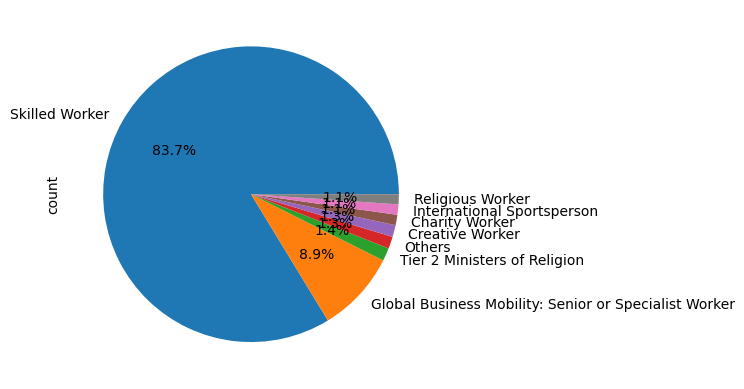

In [26]:
#Finding the count of each type of route
agentExecuter.invoke("Create a piechart on type of routes, combine the smaller routes name it as 'others' for better readability ")

In [14]:
#Finding the different types of routes
agentExecuter.invoke("Count of town/city provides Global Business Mobility: Graduate Trainee from Route")



> Entering new AgentExecutor chain...
Thought: To count the number of town/city entries that provide "Global Business Mobility: Graduate Trainee" from the Route column, we need to filter the dataframe based on these conditions and then count the unique town/city entries.

Action: python_repl_ast
Action Input: df[df['Route'] == 'Global Business Mobility: Graduate Trainee']['Town/City'].nunique()231I now know the final answer
Final Answer: 231

> Finished chain.


{'input': 'Count of town/city provides Global Business Mobility: Graduate Trainee from Route',
 'output': '231'}

In [15]:
#Finding the count of each type of route in Colchester
agentExecuter.invoke("Find the count of each type of route in colchester")



> Entering new AgentExecutor chain...
Thought: I need to filter the dataframe for rows where the Town/City is Colchester and then count the occurrences of each type of route.
Action: python_repl_ast
Action Input: df[df['Town/City'] == 'Colchester']['Route'].value_counts()Route
Skilled Worker                                           176
Global Business Mobility: Senior or Specialist Worker      6
International Sportsperson                                 4
Charity Worker                                             1
Global Business Mobility: Graduate Trainee                 1
Tier 2 Ministers of Religion                               1
Government Authorised Exchange                             1
Creative Worker                                            1
Name: count, dtype: int64I now know the final answer. I need to list the count of each type of route in Colchester.

Final Answer: 
- Skilled Worker: 176
- Global Business Mobility: Senior or Specialist Worker: 6
- International Spo

{'input': 'Find the count of each type of route in colchester',
 'output': '- Skilled Worker: 176\n- Global Business Mobility: Senior or Specialist Worker: 6\n- International Sportsperson: 4\n- Charity Worker: 1\n- Global Business Mobility: Graduate Trainee: 1\n- Tier 2 Ministers of Religion: 1\n- Government Authorised Exchange: 1\n- Creative Worker: 1'}

In [16]:
#Exploring care organisations
agentExecuter.invoke("In organisation names, how many of them are related to care or care homes")



> Entering new AgentExecutor chain...
Thought: We need to check if the organisation names contain the word "care" or "care home".
Action: Use string methods to search for these keywords in the "Organisation Name" column.
Action Input: df['Organisation Name'].str.contains('care|Care Home', case=False).sum()Use string methods to search for these keywords in the "Organisation Name" column. is not a valid tool, try one of [python_repl_ast].I should use the python_repl_ast tool to find the number of organization names related to care or care homes.
Action: python_repl_ast
Action Input: df['Organisation Name'].str.contains('care|Care Home', case=False).sum()6994I now know the final answer
Final Answer: There are 6994 organisation names related to care or care homes.

> Finished chain.


{'input': 'In organisation names, how many of them are related to care or care homes',
 'output': 'There are 6994 organisation names related to care or care homes.'}

In [23]:
#Exploring care organisations
agentExecuter.invoke("How many organisations offer more than two type of routes?")



> Entering new AgentExecutor chain...
Thought: We need to count the number of unique organisations that offer more than two types of routes.
Action: Use the `groupby` and `nunique` functions to count the unique routes for each organisation.
Action Input: python_repl_ast
Action Input: df.groupby('Organisation Name')['Route'].nunique()Use the `groupby` and `nunique` functions to count the unique routes for each organisation. is not a valid tool, try one of [python_repl_ast].I should use the `python_repl_ast` tool to execute the code snippet.
Action: python_repl_ast
Action Input: df.groupby('Organisation Name')['Route'].nunique()Organisation Name
 McMullan Shellfish                                      1
 RSS EXPRESS LTD T/A  Ledbury Fuel Service Station       1
'O Ver St. James Ltd                                     1
(IECC Care) Independent Excel Care Consortium Limited    1
*ABOUTCARE HASTINGS LTD                                  1
                                                   

{'input': 'How many organisations offer more than two type of routes?',
 'output': 'There are 1,096 organizations that offer more than two types of routes.'}